# Air Quality Prediction

https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [1]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report


In [90]:
# read .csv from provided dataset
csv_filename="AirQualityUCI.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename, sep=";" , parse_dates= ['Date','Time'])

In [91]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-10-03,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,2004-10-03,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,2004-10-03,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,2004-10-03,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,2004-10-03,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [93]:
df.dropna(how="all",axis=1,inplace=True)

In [94]:
df.dropna(how="all",axis=0,inplace=True)

In [86]:
df = df[:9357]

In [99]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,2005-04-04,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,2005-04-04,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,2005-04-04,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,2005-04-04,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


In [100]:
cols = list(df.columns[2:])

In [101]:
for col in cols:
    if df[col].dtype != 'float64':
        str_x = pd.Series(df[col]).str.replace(',','.')
        float_X = []
        for value in str_x.values:
            fv = float(value)
            float_X.append(fv)

            df[col] = pd.DataFrame(float_X)

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [179]:
features=list(df.columns)

In [180]:
features.remove('Date')
features.remove('Time')
features.remove('PT08.S4(NO2)')

In [181]:
X = df[features]
y = df['C6H6(GT)']

In [182]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.4, random_state=0)

In [183]:
print X_train.shape, y_train.shape

(5614, 12) (5614L,)


___
# Regression

In [150]:
from sklearn.preprocessing import StandardScaler
# Scaling the features using StandardScaler:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
df[cols] = X_scaler.fit_transform(df[cols])
df[cols] = X_scaler.transform(df[cols])

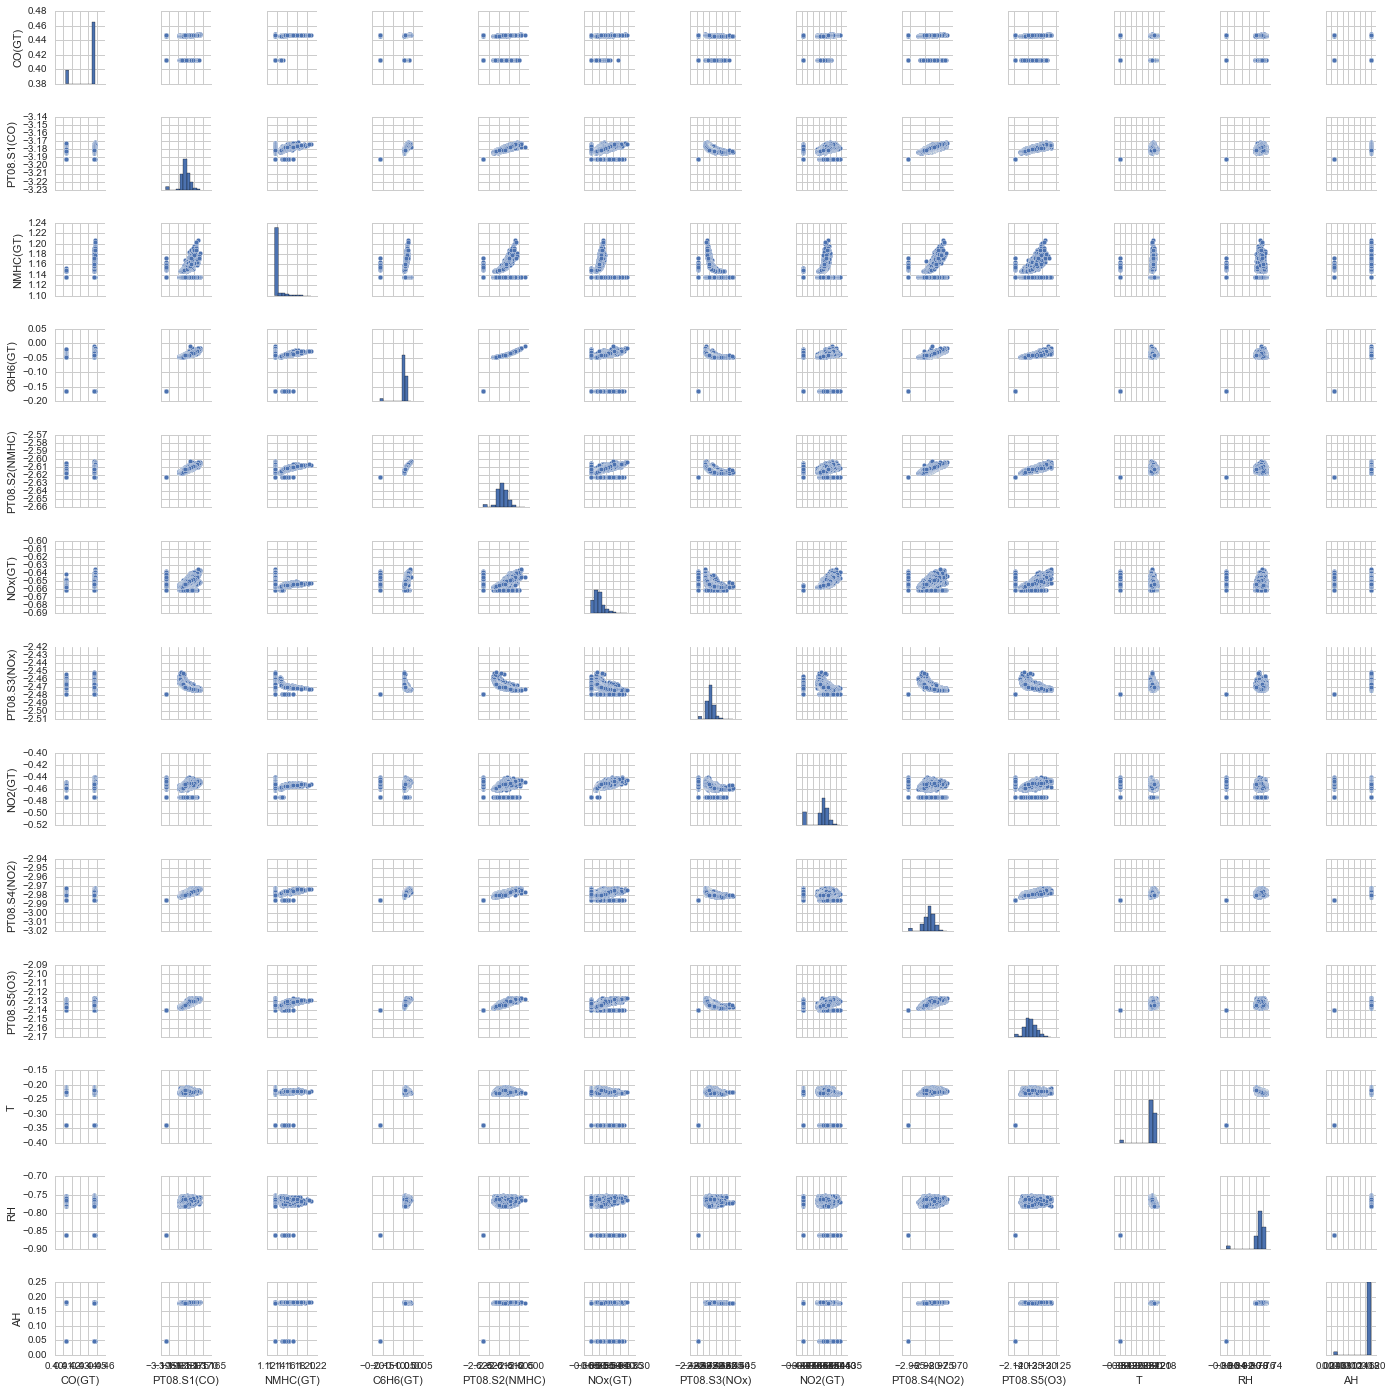

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

sns.pairplot(df[cols], size=1.5);
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

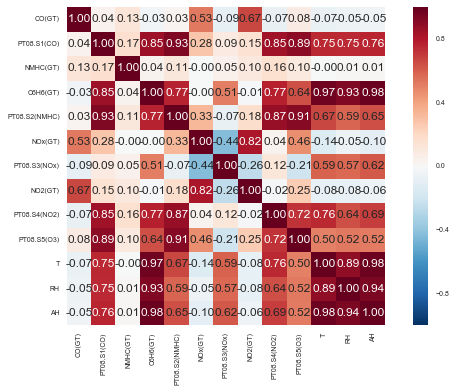

In [114]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=0.7)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 12},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

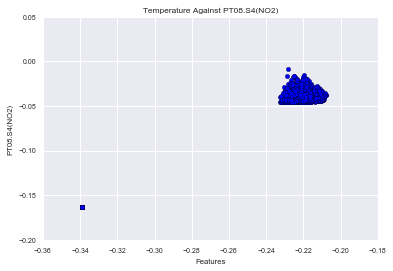

In [189]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['T'], y)
plt.xlabel('Features')
plt.ylabel('PT08.S4(NO2)')
plt.title('Temperature Against PT08.S4(NO2)')
plt.show()

In [216]:
# Scaling the features using StandardScaler:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it co

In [190]:
from sklearn.linear_model import LinearRegression

In [191]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: -0.000
Intercept: 0.000


In [154]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

In [192]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: -0.000
Intercept: -0.046


In [193]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [194]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000


In [195]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.   0.   0.   0.9  0.   0.   0.   0.   0.   0.   0.   0. ]


In [196]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.010, test: 0.010
R^2 train: 0.990, test: 0.990


Similiarly Ridge regression can be used:

In [197]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)

[ -6.96870592e-05   3.06189989e-03  -6.68652974e-04   8.43788191e-01
   3.87655751e-02   2.12359328e-03   6.09673712e-03  -1.63409695e-03
  -6.47495532e-04  -9.28343123e-03  -1.63355948e-03   1.33859043e-01]


Lastly, the ElasticNet implementation allows us to vary the L1 to L2 ratio:

In [198]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
en.fit(X_train, y_train)
y_train_pred = en.predict(X_train)
y_test_pred = en.predict(X_test)
print(en.coef_)

[-0.          0.01148043  0.          0.15248011  0.          0.          0.
  0.          0.          0.10350753  0.04716279  0.11938009]


For example, if we set l1_ratio to 1.0, the ElasticNet regressor would be
equal to LASSO regression.

## Decision tree regression

In [199]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.004, test: 0.003
R^2 train: 0.996, test: 0.997


## Random forest regression

In [200]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000


In [207]:
y_train.min()

-4.9286137447108054

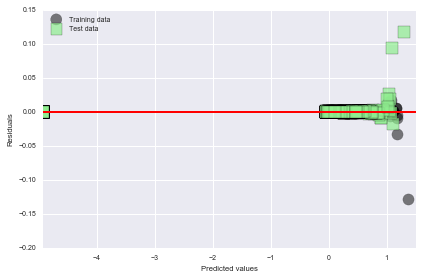

In [213]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='black', 
            marker='o', 
            s=125,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='lightgreen', 
            marker='s', 
            s=125,
            alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_train.min(),y_test.min()), xmax=max(y_train.max(), y_test.max()), lw=2, color='red')
plt.xlim([min(y_train.min(),y_test.min()), max(y_train.max(), y_test.max())])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

___

In [214]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import train_test_split
from sklearn. cross_validation import cross_val_score

from sklearn.feature_selection import *
from sklearn import metrics

# Linear Regression

In [217]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print 'R-squared:', regressor.score(X_test, y_test)

R-squared: 1.0


In [218]:
scores = cross_val_score(regressor, X, y, cv=5)
print "Average of scores: ", scores.mean()
print "Cross validation scores: ", scores

Average of scores:  0.999993666183
Cross validation scores:  [ 0.99996833  1.          1.          1.          1.        ]


Let's inspect some of the model's predictions and plot the true quality scores against the predicted scores:

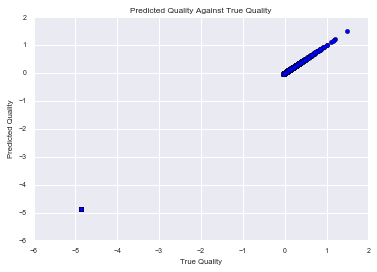

In [219]:
plt.scatter(y_test,y_predictions)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality')
plt.show()

# SGDRegressor

Here we use stochastic gradient descent to estimate the parameters of a model with
scikit-learn. SGDRegressor is an implementation of SGD that can be used even for
regression problems with hundreds of thousands or more features. It can be used
to optimize different cost functions to fit different linear models; by default, it will
optimize the residual sum of squares. 

In [220]:
# Scaling the features using StandardScaler:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it co

In [221]:
regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print 'Cross validation r-squared scores:', scores
print 'Average cross validation r-squared score:', np.mean(scores)
regressor.fit_transform(X_train, y_train)
print 'Test set r-squared score', regressor.score(X_test, y_test)

Cross validation r-squared scores: [ 0.99820401  0.99818771  0.99835852  0.99878737  0.99831664]
Average cross validation r-squared score: 0.998370850903
Test set r-squared score 0.998262067282


C:\Miniconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


# Selecting the best features

In [222]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=33)

Sometimes there are a lot of features in the dataset, so before learning, we should try to see which features are more relevant for our learning task, i.e. which of them are better prize predictors. We will use the SelectKBest method from the feature_selection package, and plot the results.

In [224]:
df.columns

Index([u'Date', u'Time', u'CO(GT)', u'PT08.S1(CO)', u'NMHC(GT)', u'C6H6(GT)',
       u'PT08.S2(NMHC)', u'NOx(GT)', u'PT08.S3(NOx)', u'NO2(GT)',
       u'PT08.S4(NO2)', u'PT08.S5(O3)', u'T', u'RH', u'AH'],
      dtype='object')

In [227]:
a = list[df.columns[2:]]

TypeError: 'type' object has no attribute '__getitem__'

In [230]:
feature_names = list(df.columns[2:])

In [232]:
feature_names.remove('PT08.S4(NO2)')

[(False, 'CO(GT)'), (True, 'PT08.S1(CO)'), (False, 'NMHC(GT)'), (False, 'C6H6(GT)'), (True, 'PT08.S2(NMHC)'), (False, 'NOx(GT)'), (False, 'PT08.S3(NOx)'), (False, 'NO2(GT)'), (False, 'PT08.S5(O3)'), (True, 'T'), (True, 'RH'), (True, 'AH')]


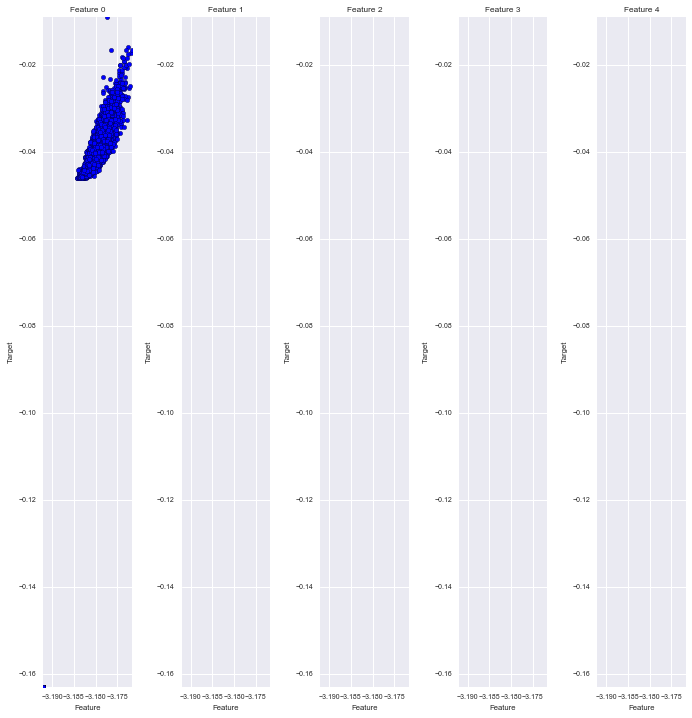

In [234]:
from sklearn.feature_selection import *

fs=SelectKBest(score_func=f_regression,k=5)
X_new=fs.fit_transform(X_train,y_train)
print zip(fs.get_support(),feature_names)

x_min, x_max = X_new[:,0].min(), X_new[:, 0].max()
y_min, y_max = y_train.min(), y_train.max()

fig=plt.figure()
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Two subplots, unpack the axes array immediately
fig, axes = plt.subplots(1,5)

fig.set_size_inches(12,12)

for i in range(5):
    axes[i].set_aspect('equal')
    axes[i].set_title('Feature ' + str(i))
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Target')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_new[:,i],y_train)

In regression tasks, is very important to normalize data (to avoid that large-valued features weight too much in the final result)

In [235]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)

X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

print np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train)

9.26478671796 -4.95114422825 -1.11619104693e-14 1.49107035114 -4.87256850449 2.42264998619e-16


C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it co

# A Linear Model

Let's start with a lineal model, SGDRegressor, that tries to find the hyperplane that minimizes a certain loss function (typically, the sum of squared distances from each instance to the hyperplane). It uses Stochastic Gradient Descent to find the minimum. 

Regression poses an additional problem: how should we evaluate our results? Accuracy is not a good idea, since
we are predicting real values, it is almost impossible for us to predict exactly the final value. There are several measures that can be used (you can look at the list of functions under sklearn.metrics module). The most common is the R2 score, or coefficient of determination that measures the proportion of the outcomes variation explained by the model, and is the default score function for regression methods in scikit-learn. This score reaches its maximum value of 1 when the model perfectly predicts all the test target values. 

In [236]:
from sklearn.cross_validation import *
def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print "Coefficient of determination on training set:",clf.score(X_train, y_train)
    
    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold(X_train.shape[0], 5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print "Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores)

In [237]:
from sklearn import linear_model
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42)
train_and_evaluate(clf_sgd,X_train,y_train)
print clf_sgd.coef_

Coefficient of determination on training set: 0.998521032316
Average coefficient of determination using 5-fold crossvalidation: 0.998347675549
[-0.00203934  0.037831   -0.00643619  0.28580185  0.15658046  0.00879088
  0.05961933  0.00366377  0.0145986   0.17708452  0.08886078  0.26907647]


You probably noted the penalty=None parameter when we called the method. The penalization parameter for linear regression methods is introduced to avoid overfitting. It does this by penalizing those hyperplanes having some of their coefficients too large, seeking hyperplanes where each feature contributes more or less the same to the predicted value. This parameter is generally the L2 norm (the squared sums of the coefficients) or the L1 norm (that is the sum of the absolute value of the coefficients). Let's see how our model works if we introduce an L2 or L1 penalty.

In [238]:
clf_sgd1 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2',  random_state=42)
train_and_evaluate(clf_sgd1,X_train,y_train)

Coefficient of determination on training set: 0.998519126977
Average coefficient of determination using 5-fold crossvalidation: 0.998346089899


In [239]:
clf_sgd2 = linear_model.SGDRegressor(loss='squared_loss', penalty='l1',  random_state=42)
train_and_evaluate(clf_sgd2,X_train,y_train)

Coefficient of determination on training set: 0.998523707937
Average coefficient of determination using 5-fold crossvalidation: 0.998350925502


# Support Vector Machines for regression
The regression version of SVM can be used instead to find the hyperplane (note how easy is to change the classification method in scikit-learn!). We will try a linear kernel, a polynomial kernel, and finally, a rbf kernel. For more information on kernels, see http://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [240]:
from sklearn import svm
clf_svr= svm.SVR(kernel='linear')
train_and_evaluate(clf_svr,X_train,y_train)

Coefficient of determination on training set: 0.997200877829
Average coefficient of determination using 5-fold crossvalidation: 0.997130094148


In [241]:
clf_svr_poly= svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly,X_train,y_train)

Coefficient of determination on training set: 0.996715736848
Average coefficient of determination using 5-fold crossvalidation: 0.996467997134


In [242]:
clf_svr_rbf= svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf,X_train,y_train)

Coefficient of determination on training set: 0.998175555087
Average coefficient of determination using 5-fold crossvalidation: 0.997721994728


In [243]:
clf_svr_poly2= svm.SVR(kernel='poly',degree=2)
train_and_evaluate(clf_svr_poly2,X_train,y_train)

Coefficient of determination on training set: 0.997507601395
Average coefficient of determination using 5-fold crossvalidation: 0.997418409054


# Random Forests for Regression
Finally, let's try again Random Forests, in their Extra Trees, and Regression version

In [244]:
from sklearn import ensemble
clf_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
train_and_evaluate(clf_et,X_train,y_train)

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.999984996366


An interesting side effect of random forest classification, is that you can measure how 'important' each feature is when predicting the final result

In [245]:
print np.sort(zip(clf_et.feature_importances_,features),axis=0)

[['0.000871438443855' 'AH']
 ['0.00124522264231' 'C6H6(GT)']
 ['0.00274730333893' 'CO(GT)']
 ['0.0105236636472' 'NMHC(GT)']
 ['0.0986656208192' 'NO2(GT)']
 ['0.193682343581' 'NOx(GT)']
 ['0.193691098263' 'PT08.S1(CO)']
 ['0.208049157099' 'PT08.S2(NMHC)']
 ['0.290523486641' 'PT08.S3(NOx)']
 ['1.28699440308e-08' 'PT08.S5(O3)']
 ['5.88877341531e-07' 'RH']
 ['6.37772359574e-08' 'T']]


Finally, evaluate our classifiers on the testing set

In [246]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True,
                        show_classification_report=True,
                        show_confusion_matrix=True,
                        show_r2_score=False):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n"

    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y,y_pred),"\n"
        
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y,y_pred),"\n"
        
    if show_r2_score:
        print "Coefficient of determination:{0:.3f}".format(metrics.r2_score(y,y_pred)),"\n"

        
measure_performance(X_test,y_test,clf_et,
                    show_accuracy=False,
                    show_classification_report=False,
                    show_confusion_matrix=False,
                    show_r2_score=True)

Coefficient of determination:1.000 



___